In [ ]:
!pip install wandb 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)


## Question 1

In [ ]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
trainX, valX, trainY, valY = trainX[:54000], trainX[54000:], trainY[:54000], trainY[54000:]
Class_Labels = ["T-shirt/Top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [ ]:
print('trainX :' + str(trainX.shape))
print('trainY :' + str(trainY.shape))
print('testX :' + str(testX.shape))
print('testY :' + str(testY.shape))

In [ ]:
plot_img = []
plot_labels = []
flag = np.zeros(10)
for i in range(len(trainX)):
      if len(plot_img) == 10 :
         break;
      if flag[trainY[i]] == 0.0 :
          plot_img.append(trainX[i])
          plot_labels.append(Class_Labels[trainY[i]])
          flag[trainY[i]] = 1

In [ ]:
import wandb
wandb.login()
from wandb.keras import WandbCallback
import warnings
warnings.filterwarnings("ignore")
wandb.init(project = 'deep-learning-assignment1')
wandb.log({"Sample From all Classes":[wandb.Image(img,caption=caption) for img, caption in zip(plot_img, plot_labels)]})

## Question 2, 3, 4:
1. Feedforward Network with Backpropagation.
2. Hyperparameter and Optimiser sweeps using wandb.ai.

In [ ]:
sweep_config = {
    'method': 'random',
    'metric': {
        'name': 'training_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'epoch': {
            'values': [5, 10]
        },
        'batch_size': {
            'values': [16, 32, 64]
        },
        'hidden_size_1': {
            'values': [32, 64, 128]
        },
        'hidden_size_2': {
            'values': [32, 64, 128]
        },
        'hidden_size_3': {
            'values': [32, 64, 128]
        },
        'hidden_size_4': {
            'values': [32, 64, 128]
        },
        'hidden_size_5': {
            'values': [32, 64, 128]
        },
        'no_of_layers': {
            'values': [3, 4, 5]
        },
        'w_decay': {
            'values': [0.0, 0.0005, 0.5]
        },
        'eta': {
            'values': [1e-3, 1e-4]
        },
        'gamma': {
            'values': [0.9]
        },
        'optimizer': {
            'values': ['gd', 'momentum', 'nadam', 'adam', 'rmsprop', 'nesterov']
        },
        'activation': {
            'values': ['sigmoid', 'tanh', 'relu']
        },
        'w_init': {
            'values': ['Xavier', 'Random']
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project = 'deep-learning-assignment1')

wandb: Agent Starting Run: 4qbyf96o with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epoch: 10
wandb: 	eta: 0.001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 128
wandb: 	no_of_layers: 5
wandb: 	optimizer: nesterov
wandb: 	w_init: Random
wandb: 	weight_decay: 0.5


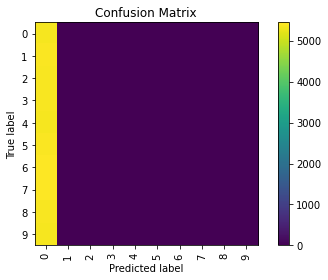

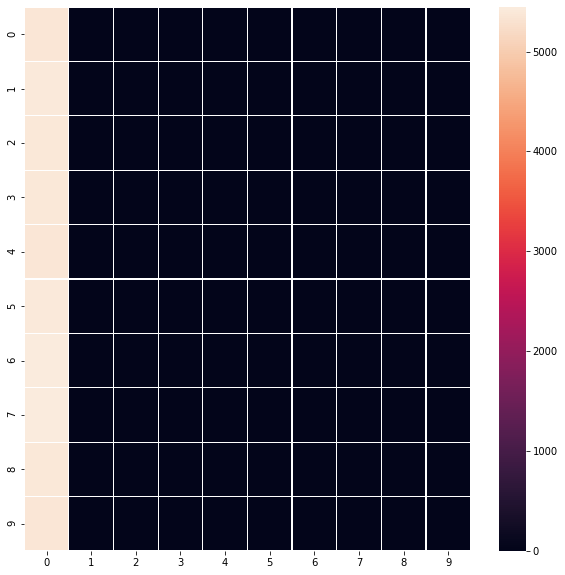

training_loss,11.51293
_runtime,974
_timestamp,1616058434
_step,42
validation_loss,11.51293
training_accuracy,0.09944
validation_accuracy,0.105


training_loss,▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_timestamp,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
validation_loss,▁▁▁▁▁▁▁▁▁▁
training_accuracy,▁▁▁▁▁▁▁▁▁▁
validation_accuracy,▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: 7nlwdt8t with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epoch: 10
wandb: 	eta: 0.001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 64
wandb: 	no_of_layers: 3
wandb: 	optimizer: nesterov
wandb: 	w_init: Xavier
wandb: 	weight_decay: 0.0005


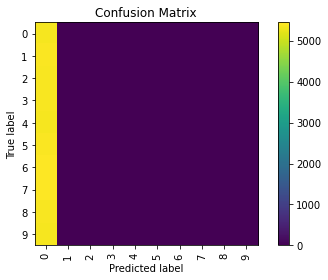

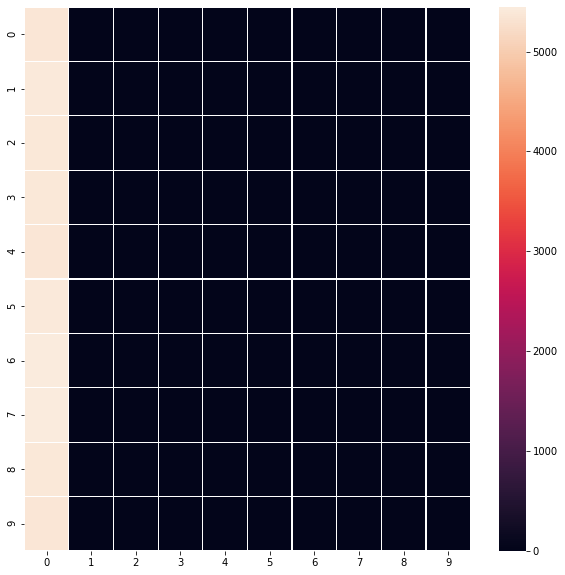

training_loss,11.48037
_runtime,735
_timestamp,1616059181
_step,42
validation_loss,11.51293
training_accuracy,0.09948
validation_accuracy,0.105


training_loss,▁▅▆▇▇▇████
_runtime,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_timestamp,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
validation_loss,▁▁▁▁▁▁▁▁▁▁
training_accuracy,█▄▃▂▂▂▁▁▁▁
validation_accuracy,▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: r7t8lgmt with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epoch: 5
wandb: 	eta: 0.001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 32
wandb: 	no_of_layers: 4
wandb: 	optimizer: nesterov
wandb: 	w_init: Xavier
wandb: 	weight_decay: 0.0005


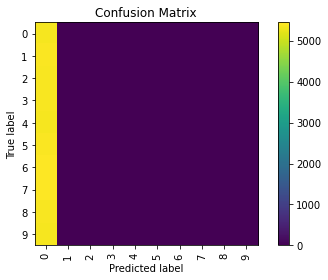

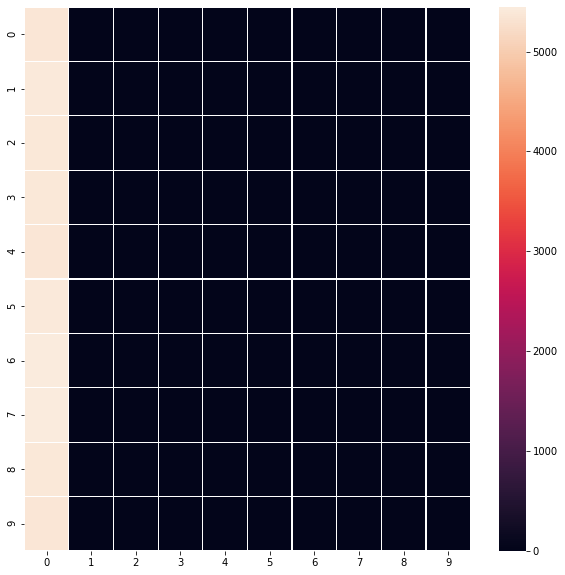

training_loss,11.51283
_runtime,413
_timestamp,1616059607
_step,22
validation_loss,11.51293
training_accuracy,0.09943
validation_accuracy,0.105


training_loss,▁▅▇██
_runtime,▁▁▁▁▃▃▃▃▄▄▄▄▆▆▆▆███████
_timestamp,▁▁▁▁▃▃▃▃▄▄▄▄▆▆▆▆███████
_step,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇██
validation_loss,▁▁▁▁▁
training_accuracy,▁▅▇██
validation_accuracy,▁▁▁▁▁


wandb: Agent Starting Run: l0j3194j with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epoch: 5
wandb: 	eta: 0.001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 32
wandb: 	no_of_layers: 4
wandb: 	optimizer: nesterov
wandb: 	w_init: Random
wandb: 	weight_decay: 0.5


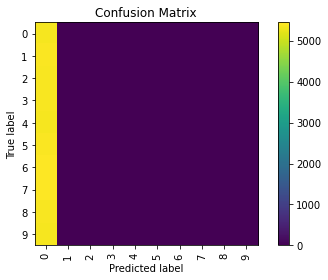

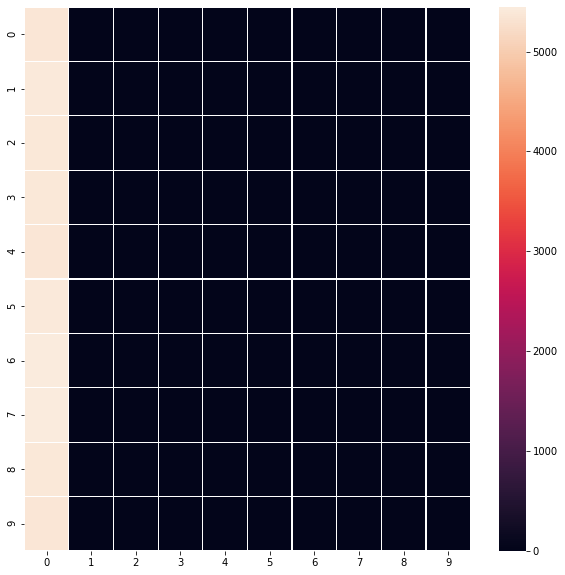

training_loss,11.49933
_runtime,690
_timestamp,1616060312
_step,22
validation_loss,11.51293
training_accuracy,0.09944
validation_accuracy,0.105


training_loss,▁▅▇██
_runtime,▁▁▁▁▃▃▃▃▄▄▄▄▆▆▆▆███████
_timestamp,▁▁▁▁▃▃▃▃▄▄▄▄▆▆▆▆███████
_step,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇██
validation_loss,▁▁▁▁▁
training_accuracy,▁▁▁▁▁
validation_accuracy,▁▁▁▁▁


wandb: Agent Starting Run: dc7lgqqm with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epoch: 10
wandb: 	eta: 0.0001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 128
wandb: 	no_of_layers: 3
wandb: 	optimizer: momentum
wandb: 	w_init: Xavier
wandb: 	weight_decay: 0.0005


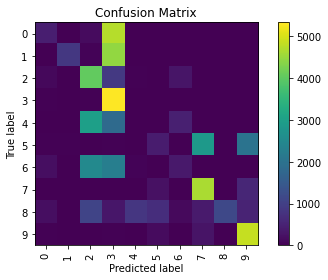

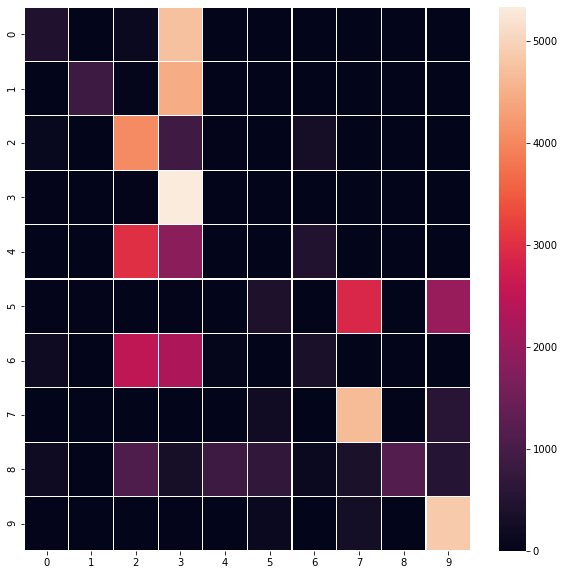

training_loss,2.18708
_runtime,482
_timestamp,1616060807
_step,42
validation_loss,2.17596
training_accuracy,0.42497
validation_accuracy,0.4423


training_loss,█▆▅▄▃▃▂▂▁▁
_runtime,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_timestamp,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
validation_loss,█▇▆▅▅▄▃▂▂▁
training_accuracy,▁▄▆▇▇█████
validation_accuracy,▁▄▆▇██████


wandb: Agent Starting Run: b65iftox with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epoch: 5
wandb: 	eta: 0.001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 64
wandb: 	no_of_layers: 4
wandb: 	optimizer: adam
wandb: 	w_init: Random
wandb: 	weight_decay: 0.0005


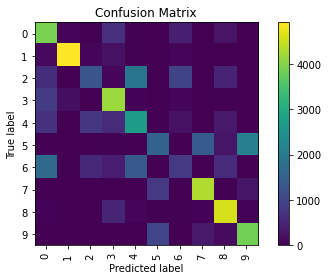

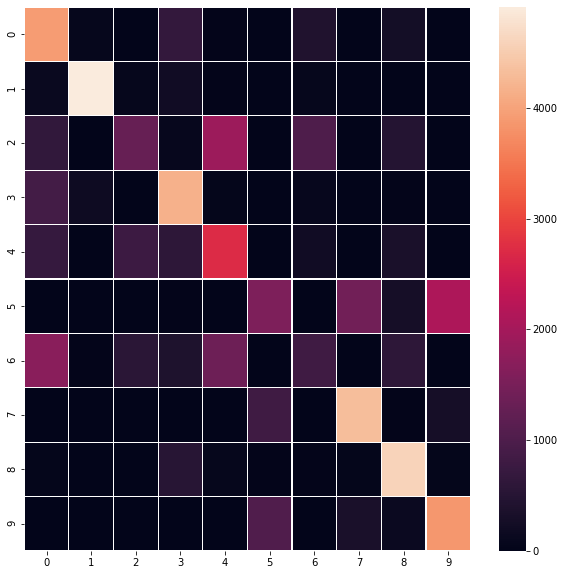

training_loss,1.28277
_runtime,295
_timestamp,1616061117
_step,22
validation_loss,1.13752
training_accuracy,0.51566
validation_accuracy,0.5575


training_loss,█▅▃▂▁
_runtime,▁▁▁▁▃▃▃▃▄▄▄▄▆▆▆▆███████
_timestamp,▁▁▁▁▃▃▃▃▄▄▄▄▆▆▆▆███████
_step,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇██
validation_loss,█▅▃▂▁
training_accuracy,▁▄▆▇█
validation_accuracy,▁▄▆▇█


wandb: Agent Starting Run: lgw3813y with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epoch: 10
wandb: 	eta: 0.001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 64
wandb: 	no_of_layers: 4
wandb: 	optimizer: momentum
wandb: 	w_init: Xavier
wandb: 	weight_decay: 0.0005


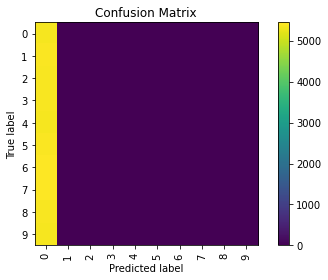

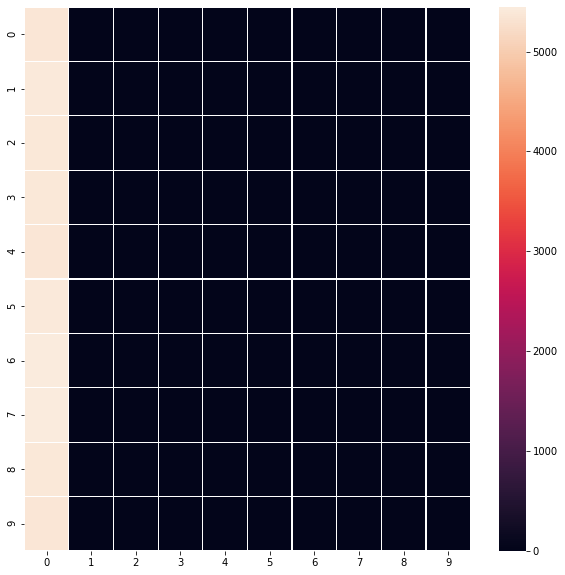

training_loss,11.51278
_runtime,534
_timestamp,1616061667
_step,42
validation_loss,11.51293
training_accuracy,0.09944
validation_accuracy,0.105


training_loss,▁▅▆▇▇▇████
_runtime,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇██████
_timestamp,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇██████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
validation_loss,▁▁▁▁▁▁▁▁▁▁
training_accuracy,▁▅▆▇▇▇████
validation_accuracy,▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: l7bp7eds with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epoch: 5
wandb: 	eta: 0.001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 64
wandb: 	no_of_layers: 5
wandb: 	optimizer: adam
wandb: 	w_init: Xavier
wandb: 	weight_decay: 0.0005


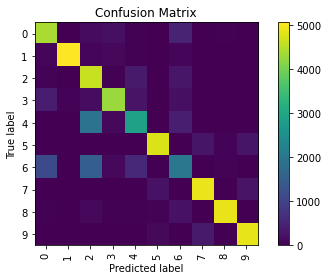

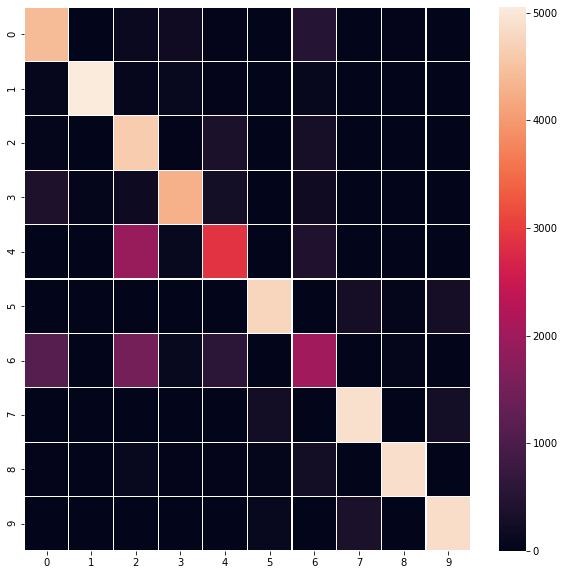

training_loss,0.85969
_runtime,336
_timestamp,1616062018
_step,22
validation_loss,0.75571
training_accuracy,0.72418
validation_accuracy,0.72697


training_loss,█▄▃▂▁
_runtime,▁▁▁▁▃▃▃▃▄▄▄▄▆▆▆▆███████
_timestamp,▁▁▁▁▃▃▃▃▄▄▄▄▆▆▆▆███████
_step,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇██
validation_loss,█▆▄▂▁
training_accuracy,▁▄▆▇█
validation_accuracy,▁▃▅▇█


wandb: Agent Starting Run: qik1leei with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epoch: 10
wandb: 	eta: 0.001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 32
wandb: 	no_of_layers: 3
wandb: 	optimizer: nadam
wandb: 	w_init: Random
wandb: 	weight_decay: 0.5


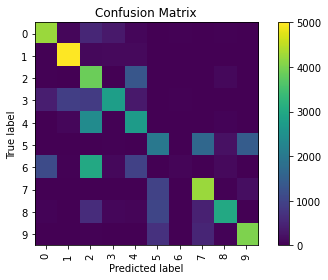

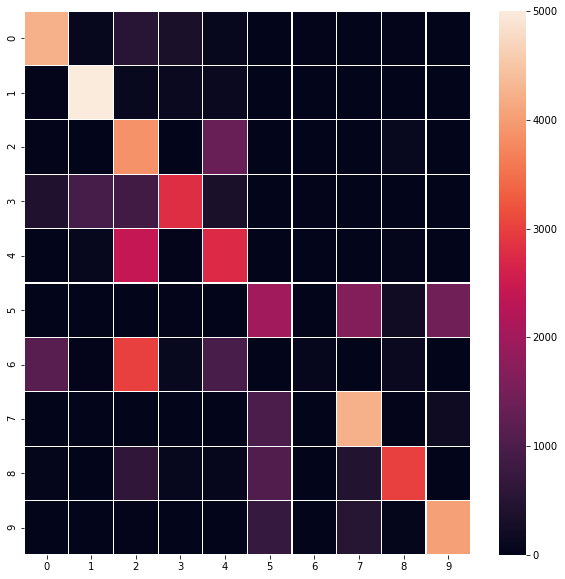

training_loss,1.35402
_runtime,479
_timestamp,1616062513
_step,42
validation_loss,1.28183
training_accuracy,0.51702
validation_accuracy,0.53307


training_loss,█▅▄▃▃▂▂▁▁▁
_runtime,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_timestamp,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
validation_loss,█▆▅▄▄▃▂▂▁▁
training_accuracy,▁▃▄▅▆▆▇▇██
validation_accuracy,▁▂▃▄▅▆▇▇██


wandb: Agent Starting Run: sxftkiun with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epoch: 10
wandb: 	eta: 0.001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 32
wandb: 	no_of_layers: 5
wandb: 	optimizer: nadam
wandb: 	w_init: Xavier
wandb: 	weight_decay: 0.5


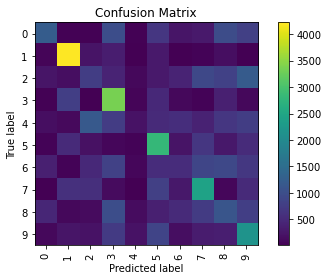

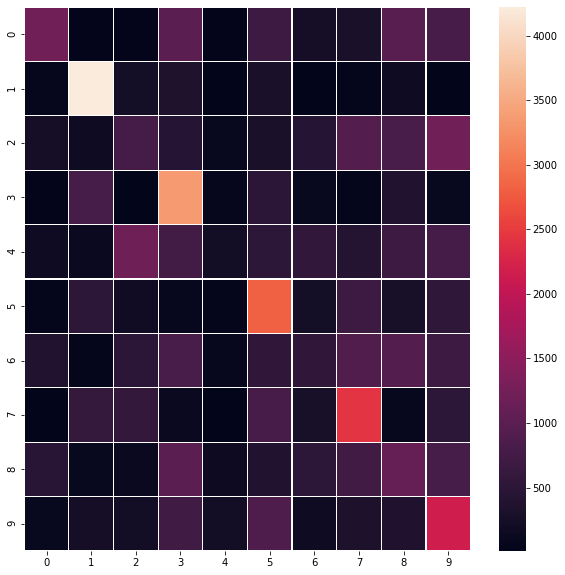

training_loss,1.79158
_runtime,1033
_timestamp,1616063562
_step,42
validation_loss,1.84241
training_accuracy,0.37974
validation_accuracy,0.3742


training_loss,█▇▇▄▃▂▁▁▁▁
_runtime,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_timestamp,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
validation_loss,█▄▃▂▃▂▂▁▁▁
training_accuracy,▁▂▃▆▇▇████
validation_accuracy,▁▅▆▇▆▇████


wandb: Sweep Agent: Waiting for job.
wandb: Network error (HTTPError), entering retry loop. See wandb/debug-internal.log for full traceback.
wandb: Network error resolved after 0:03:08.364770, resuming normal operation.
wandb: Job received.
wandb: Agent Starting Run: kbn2acsh with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epoch: 10
wandb: 	eta: 0.001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 128
wandb: 	no_of_layers: 4
wandb: 	optimizer: nesterov
wandb: 	w_init: Xavier
wandb: 	weight_decay: 0.5


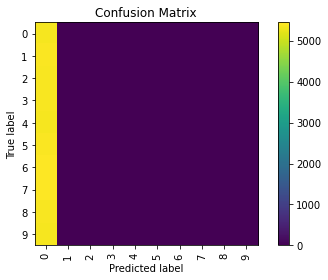

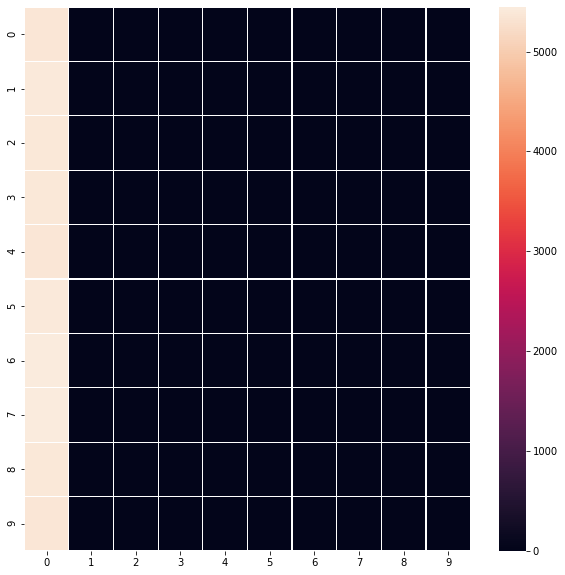

training_loss,11.50193
_runtime,1402
_timestamp,1616065170
_step,42
validation_loss,11.51293
training_accuracy,0.09949
validation_accuracy,0.105


training_loss,▁▅▆▇▇▇████
_runtime,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_timestamp,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇██████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
validation_loss,▁▁▁▁▁▁▁▁▁▁
training_accuracy,█▄▃▂▂▂▁▁▁▁
validation_accuracy,▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: l2mqccng with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epoch: 10
wandb: 	eta: 0.0001
wandb: 	gamma: 0.9
wandb: 	hidden_size: 64
wandb: 	no_of_layers: 4
wandb: 	optimizer: gd
wandb: 	w_init: Random
wandb: 	weight_decay: 0.0005


In [ ]:
class FeedForward_Network:

    A = {}
    H = {}
    input_x = 0
    output_x = 0
    no_of_layers  = 0
    no_of_neurons = []
    weights = []
    biases = []
    activation_functions = []
    loss_function = ''
    initialization_function = ''
    w_decay = 0.0

    def load_data(self):
        ((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
        trainX, valX, trainY, valY = trainX[:54000], trainX[54000:], trainY[:54000], trainY[54000:]
        Class_Labels = ["T-shirt/Top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

        #One Hot encoded target values
        trainY = tf.keras.utils.to_categorical(trainY, num_classes = None, dtype = "int32")
        testY = tf.keras.utils.to_categorical(testY, num_classes = None, dtype = "int32")
        valY = tf.keras.utils.to_categorical(valY, num_classes = None, dtype = "int32")

        #Reshape X
        trainX = np.reshape(trainX, (54000, 784))
        valX = np.reshape(valX, (6000, 784))
        testX = np.reshape(testX, (10000, 784))
        return (trainX, trainY, valX, valY)

    def init_func(self, w_init, layers_hidden, g, loss_function):
        Random_seed = 1567
        np.random.seed(Random_seed)
        input_x = 784
        output_x = 10
        self.no_of_layers = len(layers_hidden)
        self.no_of_neurons = [input_x] + layers_hidden + [output_x]
        self.activation_functions = g             #Softmax, ReLU, TanH
        self.initialization_function = w_init     #Random, Xavier
        if self.initialization_function == 'Random':
            self.weights = [np.random.randn(x, y) for x, y in zip(self.no_of_neurons[:-1], self.no_of_neurons[1:])]
        elif self.initialization_function == 'Xavier':
            self.weights = [(np.random.randn(x, y) * (np.sqrt(2 / x))) for x, y in zip(self.no_of_neurons[:-1], self.no_of_neurons[1:])]
        self.biases = [np.zeros((1, x)) for x in self.no_of_neurons[1:]]
        self.loss_function = loss_function

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def softmax(self, x):
        e = np.exp(x)
        return np.nan_to_num(e/np.sum(e))

    def relu(self, x):
        leak = 0.001
        return np.maximum(0, x) + leak * x * (x < 0)

    def tanh(self, x):
        ne = np.exp(-x)
        pe = np.exp(x)
        return np.nan_to_num((pe - ne) / (pe + ne))

    def grad_sigmoid(self, x):
        return self.sigmoid(x) * (1-self.sigmoid(x))

    def grad_relu(self, x):
        leak = 0.001
        return (x>0).astype(x.dtype) + leak * (x<0).astype(x.dtype)
    
    def grad_tanh(self, x):
        return 1 - (self.tanh(x))**2

    #Forward Propagation
    def for_prop(self, X):
        W = self.weights
        b = self.biases
        a = {}
        h = {}
        X = np.reshape(X, (1, 784))
        h[0] = self.H[0] = X
        for layer in range (self.no_of_layers): # 0,1,2
            a[layer + 1] = np.matmul(h[layer], W[layer]) + b[layer]
            self.A[layer + 1] = a[layer + 1]
            if self.activation_functions == 'sigmoid':
                h[layer + 1] = self.sigmoid(a[layer + 1])
            if self.activation_functions == 'tanh':
                h[layer + 1] = self.tanh(a[layer + 1])
            if self.activation_functions == 'relu':
                h[layer + 1] = self.relu(a[layer + 1])
            self.H[layer + 1] = h[layer + 1]
        a[self.no_of_layers + 1] = np.matmul(h[self.no_of_layers], W[self.no_of_layers]) + b[self.no_of_layers]
        self.A[self.no_of_layers + 1] = a[self.no_of_layers + 1]
        h[self.no_of_layers + 1] = self.softmax(a[self. no_of_layers + 1])
        self.H[self.no_of_layers + 1] = h[self.no_of_layers + 1]
        return h[self.no_of_layers + 1]

    #Backpropagation
    def back_prop(self, x, y):
        self.dA = {}
        self.dH = {}
        self.db = {}
        self.dW = {}
        L = self.no_of_layers + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L - 1, -1, -1):
            self.dW[k] = np.matmul(self.H[k].T, self.dA[k + 1]) + self.w_decay * self.weights[k]
            self.db[k] = self.dA[k + 1]
            if k == 0:
                break;
            self.dH[k] = np.matmul(self.dA[k + 1], self.weights[k].T)
            if self.activation_functions == 'sigmoid':
                self.dA[k] = np.multiply(self.dH[k], self.grad_sigmoid(self.H[k]))
            if self.activation_functions == 'tanh':
                self.dA[k] = np.multiply(self.dH[k], self.grad_tanh(self.H[k]))
            if self.activation_functions == 'relu':
                self.dA[k] = np.multiply(self.dH[k], self.grad_relu(self.H[k]))
        return (self.dW, self.db)

    def estimate(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.for_prop(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()
    
    def confusion_matrix(self, trainX, trainY):
        Class_Label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
        Y_hat = self.estimate(trainX)
        y_true = np.argmax(trainY, axis = 1)
        y_pred = np.argmax(Y_hat, axis = 1)

        wandb.log({"conf_mat" : wandb.plot.confusion_matrix(probs = None,
                        y_true = y_true, preds = y_pred,
                        class_names = Class_Label)})
        
        #Blue Heatmap
        cn_matrix = confusion_matrix(y_true = y_true, y_pred = y_pred, labels = Class_Label)
        ConfusionMatrixDisplay(cn_matrix, Class_Label).plot(include_values = False, xticks_rotation = "vertical")
        plt.savefig('Confusion_Matrix_1.png', bbox_inches = 'tight')
        plt.title("Confusion Matrix")
        plt.tight_layout()
        plt.show()

        #SNS Heatmap
        plt.figure(figsize = (10, 10))
        sns.heatmap(cn_matrix, annot = False, xticklabels = Class_Label, yticklabels = Class_Label, linewidths = .1)
        plt.savefig('Confusion_Matrix.png', bbox_inches = 'tight')
        plt.show()
        wandb.log({"image_confusion_matrix": [wandb.Image('Confusion_Matrix.png')]})
        wandb.log({"image_confusion_matrix": [wandb.Image('Confusion_Matrix_1.png')]})


    def train_model(self):
        config_defaults = {
            'epoch': 5,
            'batch_size': 16,
            'hidden_size_1': 32,
            'hidden_size_2': 32,
            'hidden_size_3': 64,
            'hidden_size_4': 64,
            'hidden_size_5': 128,
            'no_of_layers': 5,
            'w_decay': 0.0,
            'eta': 1e-3,
            'gamma': 0.9,
            'optimizer': 'adam',
            'activation': 'sigmoid',
            'w_init': 'Xavier'
        }
        wandb.init(config = config_defaults)
        config = wandb.config
        name = "HL=" + str(config.no_of_layers) + "_BS=" + str(config.batch_size) + "_OPT=" + str(config.optimizer) + "_ACT=" + str(config.activation)
        wandb.init().name = name
        
        loss_function = 'ce'
        eta = config.eta
        gamma = config.gamma
        batch_size = config.batch_size
        optimizer = config.optimizer
        self.w_decay = config.w_decay

        layers_hidden = []
        for i in range(config.no_of_layers):
            if i + 1 == 1:
                layers_hidden.append(config.hidden_size_1)
            elif i + 1 == 2:
                layers_hidden.append(config.hidden_size_2)
            elif i + 1 == 3:
                layers_hidden.append(config.hidden_size_3)
            elif i + 1 == 4:
                layers_hidden.append(config.hidden_size_4)
            elif i + 1 == 5:
                layers_hidden.append(config.hidden_size_5)

        #Load_Data
        trainX, trainY, valX, valY = self.load_data()

        self.init_func(config.w_init, layers_hidden, config.activation, loss_function)

        #Variables for Momentum and Nesterov
        prev_weights = [np.zeros((x, y)) for x, y in zip(self.no_of_neurons[:-1], self.no_of_neurons[1:])]
        prev_biases = [np.zeros((1, x)) for x in self.no_of_neurons[1:]]
        training_loss = []
        validation_loss = []

        #Variables for RMSProp and Adam
        eps, beta1, beta2 = 1e-8, 0.8, 0.999 
        v_w_rms = np.zeros_like(self.weights)
        v_b_rms = [np.zeros((1, x)) for x in self.no_of_neurons[1:]]
        v_w_adam = np.zeros_like(self.weights)
        v_b_adam = [np.zeros((1, x)) for x in self.no_of_neurons[1:]]
        m_w_adam = np.zeros_like(self.weights)
        m_b_adam = [np.zeros((1, x)) for x in self.no_of_neurons[1:]]

        accuracy_train = []
        accuracy_validation = []

        for t in range(config.epoch):
            batch_loss = 0
            batch = 0
            accuracy = 0
            val_accuracy = 0

            dw = np.zeros_like(self.weights)
            db_temp = [np.zeros((1, x)) for x in self.no_of_neurons[1:]]
            dw1 = np.zeros_like(self.weights)
            db1_temp = [np.zeros((1, x)) for x in self.no_of_neurons[1:]]

            for i in range(0, trainX.shape[0], config.batch_size):
                trainX_mini = trainX[i:i + config.batch_size]
                trainY_mini = trainY[i:i + config.batch_size]
                
                for x in range(len(trainX_mini)):
                    #Forward Propagation
                    y_hat = self.for_prop(trainX_mini[x])

                    #Loss and Accuracy
                    n = np.argmax(trainY_mini[x])
                    batch_loss += (- np.log(y_hat[0][n] + 1e-5))
                    if n == np.argmax(y_hat[0]):
                        accuracy += 1

                    #Backward Propagation
                    (dw_new, db_temp_new) = self.back_prop(trainX_mini[x], trainY_mini[x])
                    for z in range(len(dw_new)):
                        dw[z] += dw_new[z]
                        db_temp[z] += db_temp_new[z]

                for z in range(len(dw_new)):
                    dw[z] /= batch_size
                    db_temp[z] /= batch_size
                
                update_w = {}
                update_b = {}

                #update rule
                if config.optimizer == 'gd':
                    l = len(dw)
                    for j in range(l):
                        update_w[j] = dw[j] * config.eta
                        update_b[j] = db_temp[j] * config.eta
                
                elif optimizer == 'momentum':
                    l = len(dw)
                    for j in range(l):
                        update_w[j] = gamma * prev_weights[j] + dw[j] * eta
                        update_b[j] = gamma * prev_biases[j] + db_temp[j] * eta
                        prev_weights[j] = update_w[j]
                        prev_biases[j]  = update_b[j]
                
                elif optimizer == 'nesterov':
                    v_w = {}
                    v_b = {}
                    for i in range(len(prev_weights)):
                        v_w[i] = gamma * prev_weights[i]
                        v_b[i] = gamma * prev_biases[i]
                        self.weights[i] -= v_w[i]
                        self.biases[i] -= v_b[i]

                    for x in range(len(trainX_mini)):
                        #Backward Propagation
                        (dw1_new, db1_temp_new) = self.back_prop(trainX_mini[x], trainY_mini[x])
                        for z in range(len(dw1_new)):
                            dw1[z] += dw_new[z]
                            db1_temp[z] += db1_temp_new[z]

                    for i in range(len(dw1)):
                        update_w[i] = v_w[i] + dw1[i] * eta
                        update_b[i] = v_b[i] + db1_temp[i] * eta
                        prev_weights[i] = update_w[i]
                        prev_biases[i] = update_b[i]    

                elif optimizer == 'rmsprop':
                    for i in range(len(dw)):
                        v_w_rms[i] = v_w_rms[i] * beta1 + (1 - beta1) * np.square(dw[i])
                        v_b_rms[i] = v_b_rms[i] * beta1 + (1 - beta1) * np.square(db_temp[i])
                        v_w_corrected = 1 / (np.sqrt(v_w_rms[i] + eps))
                        v_b_corrected = 1 / (np.sqrt(v_b_rms[i] + eps))
                                            
                        update_w[i] = v_w_corrected * dw[i] * eta
                        update_b[i] = v_b_corrected * db_temp[i] * eta
                        
        
                elif optimizer == 'adam':
                    for j in range(len(dw)):
                        m_w_adam[j] = beta1 * m_w_adam[j] + (1 - beta1) * dw[j]
                        m_b_adam[j] = beta1 * m_b_adam[j] + (1 - beta1) * db_temp[j]

                        v_w_adam[j] = beta2 * v_w_adam[j] + (1 - beta2) * np.square(dw[j])
                        v_b_adam[j] = beta2 * v_b_adam[j] + (1 - beta2) * np.square(db_temp[j])

                        m_w_hat = m_w_adam[j] / (1 - np.power(beta1, t + 1))
                        m_b_hat = m_b_adam[j] / (1 - np.power(beta1, t + 1))
                        
                        v_w_hat = v_w_adam[j] / (1 - np.power(beta2, t + 1))
                        v_b_hat = v_b_adam[j] / (1 - np.power(beta2, t + 1))
                                                
                        update_w[j] = (eta / np.sqrt(v_w_hat + eps)) * m_w_hat
                        update_b[j] = (eta / np.sqrt(v_b_hat + eps)) * m_b_hat
                
                elif optimizer == 'nadam':
                    for j in range(len(dw)):
                        m_w_adam[j] = beta1 * m_w_adam[j] + (1 - beta1) * dw[j]
                        m_b_adam[j] = beta1 * m_b_adam[j] + (1 - beta1) * db_temp[j]

                        v_w_adam[j] = beta2 * v_w_adam[j] + (1 - beta2) * np.square(dw[j])
                        v_b_adam[j] = beta2 * v_b_adam[j] + (1 - beta2) * np.square(db_temp[j])

                        m_w_hat = m_w_adam[j] / (1 - np.power(beta1, t + 1))
                        m_b_hat = m_b_adam[j] / (1 - np.power(beta1, t + 1))
                        
                        v_w_hat = v_w_adam[j] / (1 - np.power(beta2, t + 1))
                        v_b_hat = v_b_adam[j] / (1 - np.power(beta2, t + 1))

                        m_w_nadam = beta1 * m_w_hat + (1 - beta1) * dw[j]
                        m_b_nadam = beta1 * m_b_hat + (1 - beta1) * db_temp[j]
                                                
                        update_w[j] = (eta / np.sqrt(v_w_hat + eps)) * m_w_nadam
                        update_b[j] = (eta / np.sqrt(v_b_hat + eps)) * m_b_nadam

                l = len(update_w)
                for i in range(l):
                    self.weights[i] = self.weights[i] - update_w[i]
                    self.biases[i]  = self.biases[i] - update_b[i]
            
            training_loss.append(batch_loss/54000)
            accuracy_train.append(accuracy/54000)

            #validation
            val_batch_loss = 0
            for i in range(0, valX.shape[0], batch_size):
                valX_mini = valX[i:i + batch_size]
                valY_mini = valY[i:i + batch_size]

                for x in range(len(valX_mini)):
                    #Forward Propagation
                    y_hat_val = self.for_prop(valX_mini[x])

                    #Loss and Accuracy
                    n = np.argmax(valY_mini[x])
                    val_batch_loss += (- np.log(y_hat_val[0][n] + 1e-5))
                    if n == np.argmax(y_hat_val[0]):
                        val_accuracy += 1
                
            validation_loss.append(val_batch_loss/6000)
            accuracy_validation.append(val_accuracy/6000)
            wandb.log({'training_loss': np.mean(training_loss)})
            wandb.log({'validation_loss': np.mean(validation_loss)})
            wandb.log({'training_accuracy': np.mean(accuracy_train)})
            wandb.log({'validation_accuracy': np.mean(accuracy_validation)})

        #Confusion Matrix
        self.confusion_matrix(trainX, trainY)
        
        
obj = FeedForward_Network()
wandb.agent('34u9op37', function = obj.train_model)